In [1]:
import os

In [2]:
dir_im='D:\Study\Data science\Online Course\Deep Learning\Jose\TensorFlow 2.0 Bootcamp-20221017T185525Z-001\TensorFlow 2.0 Bootcamp\cell_images\cell_images'

In [3]:
os.listdir(dir_im)

['test', 'train']

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [5]:
from matplotlib.image import imread

In [6]:
test_path=dir_im +'\\test'
train_path=dir_im+'\\train'

In [7]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [8]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [10]:
paracell=train_path+'\\parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'
imread(paracell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

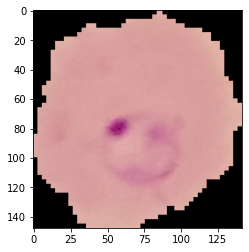

In [11]:
plt.imshow(imread(paracell))

In [12]:
k=os.listdir(train_path+'\\uninfected')[0]
uninfected_cell=train_path+'\\uninfected'+'\\'+k

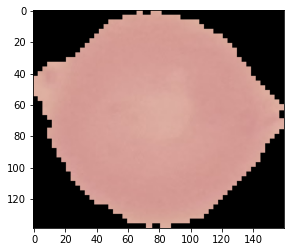

In [13]:
plt.imshow(imread(uninfected_cell))

In [14]:
pwd

'D:\\Study\\Data science\\Online Course\\Deep Learning\\Jose\\FINAL_TF2_FILES\\TF_2_Notebooks_and_Data\\04-CNNs'

In [15]:
len(os.listdir(train_path+'\parasitized'))

12480

In [16]:
len(os.listdir(train_path+'\\uninfected'))

12480

In [17]:
len(os.listdir(test_path+'\parasitized'))

1300

In [18]:
dim1=[]
dim2=[]

for im_file in os.listdir(test_path+'\\uninfected'):
    
    img=imread(test_path+'\\uninfected\\'+im_file)
    d1,d2,color=img.shape
    dim1.append(d1)
    dim2.append(d2)
    

C:\Users\vutha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


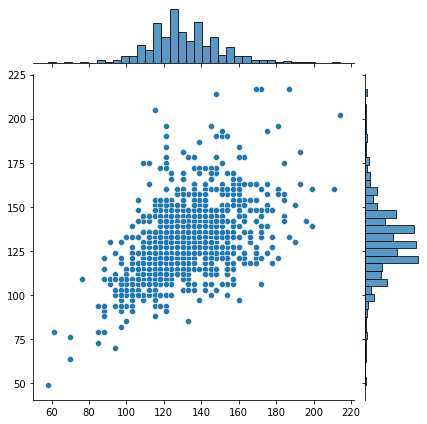

In [19]:
sns.jointplot(dim1,dim2)

In [20]:
image_shape=(130,130,3)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
im_gen=ImageDataGenerator(rotation_range=20,width_shift_range=0.1,
                         height_shift_range=0.1,
                         shear_range=0.1,
                         zoom_range=0.1,
                         horizontal_flip=True,
                         fill_mode='nearest')

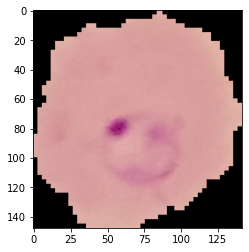

In [24]:
para_img=imread(paracell)
plt.imshow(para_img)

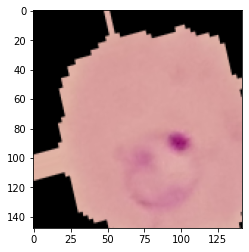

In [26]:
plt.imshow(im_gen.random_transform(para_img))

In [27]:
im_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [28]:
im_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [30]:
from tensorflow.keras.models import Sequential

In [32]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [35]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)      

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [39]:
batch_size=16

In [41]:
train_image_gen=im_gen.flow_from_directory(train_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 24958 images belonging to 2 classes.


In [42]:
test_image_gen=im_gen.flow_from_directory(test_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary',
                                         shuffle=False)

Found 2600 images belonging to 2 classes.


In [43]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

In [45]:
from tensorflow.keras.models import load_model

In [ ]:

model.save('malaria_detector.h5')

In [46]:
model=load_model('malaria_detector.h5')

In [47]:
model.evaluate_generator(test_image_gen)

C:\Users\vutha\AppData\Local\Temp\ipykernel_6160\4011314882.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_image_gen)


[35.85103225708008, 0.869615375995636]

In [48]:
model.metrics_names

['loss', 'accuracy']

In [49]:
pred=model.predict_generator(test_image_gen)

C:\Users\vutha\AppData\Local\Temp\ipykernel_6160\1813018069.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(test_image_gen)


In [51]:
prediction=pred>0.5

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(test_image_gen.classes,prediction))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1300
           1       0.97      0.77      0.86      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600



In [55]:
confusion_matrix(test_image_gen.classes,prediction)

array([[1273,   27],
       [ 300, 1000]], dtype=int64)

In [57]:
paracell

'D:\\Study\\Data science\\Online Course\\Deep Learning\\Jose\\TensorFlow 2.0 Bootcamp-20221017T185525Z-001\\TensorFlow 2.0 Bootcamp\\cell_images\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [58]:
from tensorflow.keras.preprocessing import image

In [60]:
my_image=image.load_img(paracell,target_size=image_shape)

In [61]:
my_array=image.img_to_array(my_image)

In [62]:
my_array.shape

(130, 130, 3)

In [63]:
my_array=np.expand_dims(my_array,axis=0)

In [65]:
model.predict(my_array)

1/1 [==============================] - 0s 132ms/step


array([[0.]], dtype=float32)